In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import doctor_graph as doc

%matplotlib inline

In [2]:
def get_topics(bid, bid_df):
    """Given arguments: a bid (doctor ID) and the bid_df (dataframe), 
    Extract and return a sorted series for one bid with the top 10 topics
    Eventually, extend this to include the doctor's name. """
    
    all_topics = bid_df.ix[bid,:]#type Series
    all_topics.sort(axis=0, ascending=False)
    doc_topics = all_topics[:5]
    
    return doc_topics

In [3]:
def save_fig(name, fig):
    #path = 'Users/kaschbacher/insightproject/yelp/website/app/static/img/'
    # path above doesn't work maybe because jupter is running inside yelp/git-yelp and this path is outside that
    path=''
    filename = name+'.png'
    fig.savefig((path+filename))
    

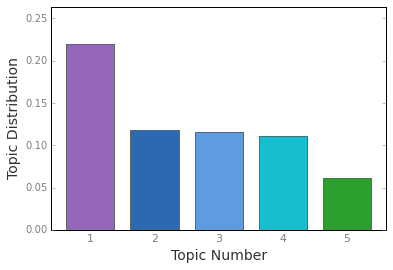

In [4]:
def main():
       
    #Load Data
    bid_df = pd.read_pickle('bid_tmeans.p')#index of this df is the bid, but can't be indexed by 'BID'
    topic_word_df = pd.read_pickle('topic_word_df.p')
    names_df = pd.read_pickle('names_df.p')
    
    # local_id passed to views by input.html
    local_id = "dr-mohammad-diab-md-san-francisco"
    str_bid = names_df.loc[names_df['yelp_id']==local_id,'BID'].values[0]
    doc_bid = int(str_bid)
    
    # Extract the top 10 topics for given doctor
    doc_topics = get_topics(doc_bid, bid_df)#returns series of 10 topics in sorted order
    selected = doc_topics.index
    
    # Make a bar graph
    palette = doc.colors() 
    fig = doc.dr_bar_graph(doc_topics, palette)
    
    #doc_name passed to views_py by input.html
    doc_name = "bid"+str(doc_bid)
    save_fig(doc_name, fig)
    
    # Make a Topic-Word Table
    table = topic_word_df.loc[selected,:]
    words_lol = table.values.tolist()
    
    
if __name__=="__main__":
    main()
 

In [19]:
pd.version.version

'0.16.1'

In [20]:
a = "304"
int(a)

304